In [17]:
#import libraries
import random
from collections import defaultdict
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [ ]:
grid_size = (10,10)
goal_state = (9,9)
initial_state = (0, 0)  # Start point
actions = ['UP', 'Down', 'Left', 'Right']  # Action Set

In [ ]:
# Generate obstacles
num_obstacles=20
obstacles=set()
while len(obstacles) < num_obstacles:
    obstacle = (random.randint(0, grid_size[0] - 1), random.randint(0, grid_size[1] - 1))
    if obstacle != initial_state and obstacle != goal_state:
        obstacles.add(obstacle)

In [ ]:
#using helper function to determine if the state is valid or not to be in the grid not out of it
def is_valid_state(state):
      return (
        0 <= state[0] < grid_size[0]
        and 0 <= state[1] < grid_size[1]
        and state not in obstacles
    )

In [ ]:
#Function to get the next state
def take_action(state, action):
    if action == 'UP':
        next_state = (state[0] - 1, state[1])
    elif action == 'Down':
        next_state = (state[0] + 1, state[1])
    elif action == 'Left':
        next_state = (state[0], state[1] - 1)
    elif action == 'Right':
        next_state = (state[0], state[1] + 1)
    else:
        next_state = state
    return next_state if is_valid_state(next_state) else state

In [ ]:
#function to get the reward
def get_reward(state):
    if state == goal_state:
        return 100  # Goal reward
    elif state in obstacles:
        return -10  # -10 for an obstacle
    elif state == initial_state:
        return 0  # Normal reward for starting
    else:
        return -1  # -1 step to encourage robot to take the shortest path to reach the goal


In [ ]:
# Q-learning parameters
alpha = 0.1  # Learning rate is responsible for the learning rate and the ability to update current information
gamma = 0.9  # Discount factor It determines the importance of current Vs future rewards for the agent, if they are close to 1, it prioritizes future rewards.
epsilon = 1.0  # It is the rate of exploration, where the exploration of the agent determines the environment, if it is 1, it will discover the entire environment
epsilon_decay = 0.99  # Decay rate reduces the value of epsilon after each training and here decreases by 1%
min_epsilon = 0.1  # Minimum exploration rate ensures that the agent continues to explore even after training so as to prevent him from relying on only the current options and may find a better option
num_episodes = 1000  # Total training episodes

In [ ]:
# Initialize Q-table
Q_table = np.zeros((grid_size[0], grid_size[1], len(actions)))

َQ-learning update function **Q(s,a)=R(s,a)+γmax
a
​
 Q(s’,a)**


In [ ]:
# Training
for episode in range(num_episodes):
  #start from intial state and set total_reward=0
    state = initial_state
    total_reward = 0
    #the goal not reached yet
    while state != goal_state:
        # choose actions based on the existence of exploration and exploitation, if the random value is less than exploration rate, a random action is chosen
        if random.uniform(0, 1) < epsilon:
            action_index = random.randint(0, len(actions) - 1)
        else:
          #if the random value is less than exploration rate, a random act is chosen, and if it is larger, the act is chosen to contain a greater Q value, so that the agent learns from his previous experiences
            action_index = np.argmax(Q_table[state[0], state[1], :])
        action = actions[action_index]
        #take actions and calculate the total reward
        next_state = take_action(state, action)
        reward = get_reward(next_state)
        total_reward += reward

        #The highest value of Q is calculated in the current state for all possible actions
        next_max = np.max(Q_table[next_state[0], next_state[1], :])
        Q_table[state[0], state[1], action_index] += alpha * (
            reward + gamma * next_max - Q_table[state[0], state[1], action_index]
        )

        state = next_state
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")


Episode 100/1000, Total Reward: -28889
Episode 200/1000, Total Reward: 73
Episode 300/1000, Total Reward: 81
Episode 400/1000, Total Reward: 81
Episode 500/1000, Total Reward: 79
Episode 600/1000, Total Reward: 81
Episode 700/1000, Total Reward: 83
Episode 800/1000, Total Reward: 83
Episode 900/1000, Total Reward: 79
Episode 1000/1000, Total Reward: 83


In [ ]:
print("\nTrained Q-Table:")
print(Q_table)


Trained Q-Table:
[[[ 6.61721257e+00  8.34489987e+00  6.90165327e+00  7.21818678e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-3.43899215e+00 -2.71000000e+00 -3.43899795e+00 -4.09483226e+00]
  [-4.02615175e+00 -3.43898778e+00 -3.43898786e+00 -4.50991887e+00]
  [-4.07508416e+00 -4.23594671e+00 -4.05383282e+00 -4.14180478e+00]
  [-4.11877926e+00 -4.10701344e+00 -4.17399841e+00 -4.14457569e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-2.78806820e+00 -2.71563605e+00 -2.69313101e+00 -2.79146789e+00]
  [-2.68719902e+00 -2.73422887e+00 -2.81728202e+00 -2.75703314e+00]
  [-2.80927375e+00 -2.83612326e+00 -2.80101220e+00 -2.82591731e+00]]

 [[ 6.69954899e+00  1.03832221e+01  7.84266917e+00  4.17615755e+00]
  [-1.90000000e+00 -1.14079887e+00  8.24864508e+00 -2.68667584e+00]
  [-3.43900000e+00 -2.71000000e+00 -9.13686443e-01 -3.43900000e+00]
  [-4.09500135e+00 -4.00319087e+00 -2.71000000e+00 -3.43899037e+00]
  [ 0.00000000e+00  0.000000

In [ ]:
def display_policy():
    policy_grid = np.empty(grid_size, dtype=str)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) == goal_state:
                policy_grid[i, j] = 'G'
            elif (i, j) in obstacles:
                policy_grid[i, j] = 'X'
            else:
                best_action = np.argmax(Q_table[i, j, :])
                policy_grid[i, j] = actions[best_action]

    print("\nLearned Policy:")
    for row in policy_grid:
        print(' '.join(row))

In [ ]:
display_policy()


Learned Policy:
D X D D L D X L U L
D L L L X X X R U R
R D X D D D U R L D
U D L D X D D U L X
X R R D X D L D X D
R R R R R D X R D D
R R R R R D D X R D
L X R R R R R D R D
X L U X R R R D X D
U X X U X R R R R G



Steps to reach the goal:
Step 1: (0, 0)
Step 2: (1, 0)
Step 3: (2, 0)
Step 4: (2, 1)
Step 5: (3, 1)
Step 6: (4, 1)
Step 7: (4, 2)
Step 8: (4, 3)
Step 9: (5, 3)
Step 10: (5, 4)
Step 11: (5, 5)
Step 12: (6, 5)
Step 13: (7, 5)
Step 14: (7, 6)
Step 15: (7, 7)
Step 16: (8, 7)
Step 17: (9, 7)
Step 18: (9, 8)
Step 19: (9, 9)

Total Steps: 18
Total Reward: 83


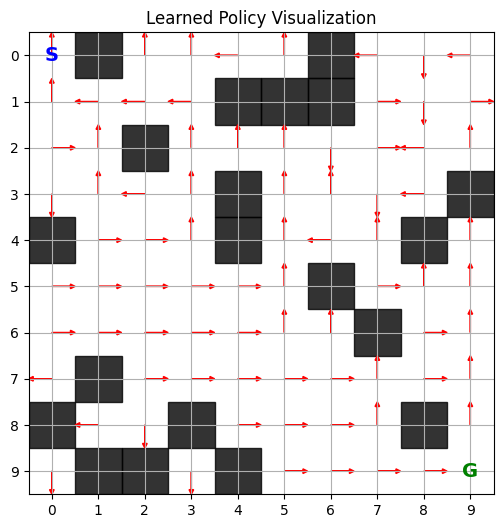

In [20]:
def visualize_policy():
    # Print the steps to reach the goal
    state = initial_state
    steps = []
    total_reward = 0

    while state != goal_state:
        # Record the current state
        steps.append(state)

        # Choose the best action based on the learned Q-table
        action_index = np.argmax(Q_table[state[0], state[1], :])
        action = actions[action_index]

        # Take the action and move to the next state
        next_state = take_action(state, action)
        reward = get_reward(next_state)
        total_reward += reward

        # Break in case of stuck states (not expected, but good for safety)
        if state == next_state:
            print("Stuck in state:", state)
            break

        state = next_state

    # Add the goal state to the steps
    steps.append(goal_state)

    # Print the steps
    print("\nSteps to reach the goal:")
    for idx, step in enumerate(steps):
        print(f"Step {idx + 1}: {step}")

    print(f"\nTotal Steps: {len(steps) - 1}")
    print(f"Total Reward: {total_reward}")

    # Visualization
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(range(grid_size[1]))
    ax.set_yticks(range(grid_size[0]))
    ax.grid(True)

    # Draw obstacles
    for obstacle in obstacles:
        rect = plt.Rectangle(
            (obstacle[1] - 0.5, obstacle[0] - 0.5), 1, 1, color='black', alpha=0.8
        )
        ax.add_patch(rect)

    # Draw start and goal states
    ax.text(
        initial_state[1],
        initial_state[0],
        'S',
        color='blue',
        ha='center',
        va='center',
        fontsize=14,
        fontweight='bold',
    )
    ax.text(
        goal_state[1],
        goal_state[0],
        'G',
        color='green',
        ha='center',
        va='center',
        fontsize=14,
        fontweight='bold',
    )

    # Draw arrows for policy
    action_arrows = {'UP': (0, 0.4), 'Down': (0, -0.4), 'Left': (-0.4, 0), 'Right': (0.4, 0)}
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) != goal_state and (i, j) not in obstacles:
                best_action = np.argmax(Q_table[i, j, :])
                dx, dy = action_arrows[actions[best_action]]
                ax.arrow(
                    j,
                    i,
                    dx,
                    dy,
                    head_width=0.1,
                    head_length=0.1,
                    fc='red',
                    ec='red',
                )

    # Reverse y-axis to align with grid indexing
    ax.invert_yaxis()
    plt.title("Learned Policy Visualization")
    plt.show()

visualize_policy()


Agent's Path: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (8, 7), (9, 7), (9, 8), (9, 9)]


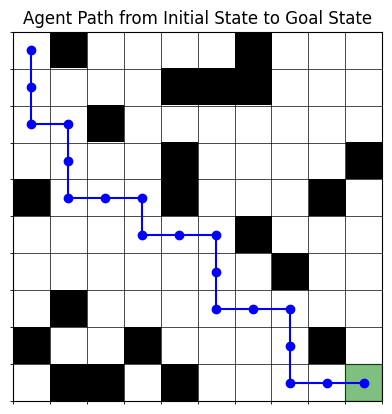

In [18]:
def visualize_agent_path():
    fig, ax = plt.subplots()

    # Create a grid
    grid = np.zeros(grid_size)
    for obstacle in obstacles:
        grid[obstacle] = 1  # Mark obstacles

    # Display the grid
    ax.imshow(grid, cmap="gray_r")

    # Add gridlines
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.5)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # Title
    ax.set_title("Agent Path from Initial State to Goal State")

    # Highlight goal state
    ax.add_patch(plt.Rectangle((goal_state[1] - 0.5, goal_state[0] - 0.5), 1, 1, color="green", alpha=0.5))

    # Visualize agent's path
    state = initial_state
    path_x = [state[1]]
    path_y = [state[0]]
    path = [state]  # Record the path as (row, col)

    while state != goal_state:
        action_index = np.argmax(Q_table[state[0], state[1], :])
        action = actions[action_index]
        next_state = take_action(state, action)

        # Append next state to path
        path_x.append(next_state[1])
        path_y.append(next_state[0])
        path.append(next_state)  # Add to path

        state = next_state

    # Print the path
    print("Agent's Path:", path)

    # Plot the path
    ax.plot(path_x, path_y, marker="o", color="blue")

    plt.show()

visualize_agent_path()
